In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


data = pd.read_csv("online_shoppers_intention.csv")

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
data.head()

In [3]:
print(data.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


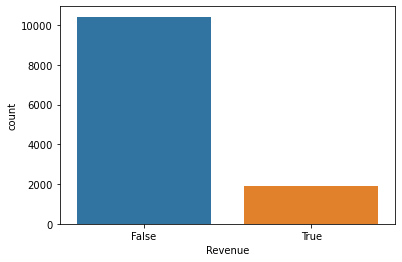

In [5]:
# Visualizing data distribution
sns.countplot(x='Revenue', data=data)
plt.show()

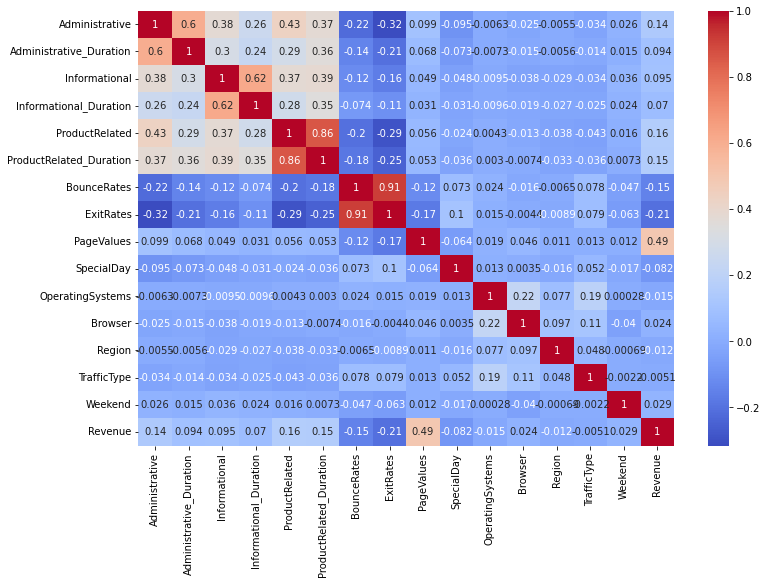

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

<AxesSubplot:title={'center':'Distribution of number of pages of this administrative type user visited '}, xlabel='Administrative', ylabel='count'>

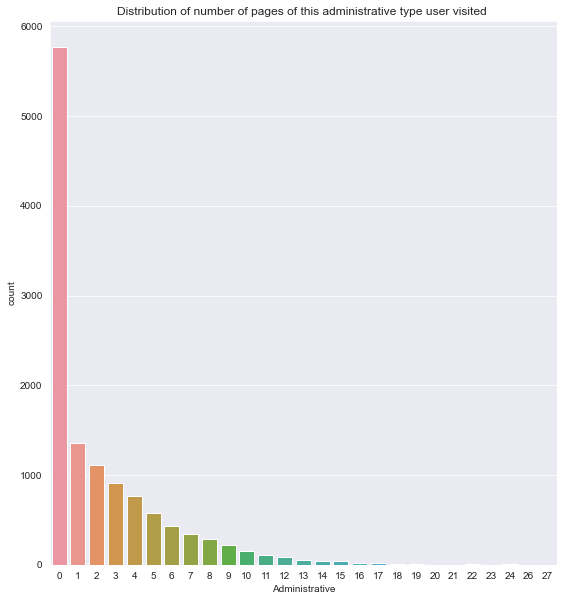

In [17]:
#1.Insights from time spent on administrative pages
sns.set_style('darkgrid')
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title('Distribution of number of pages of this administrative type user visited ')
sns.countplot(x = data['Administrative'])



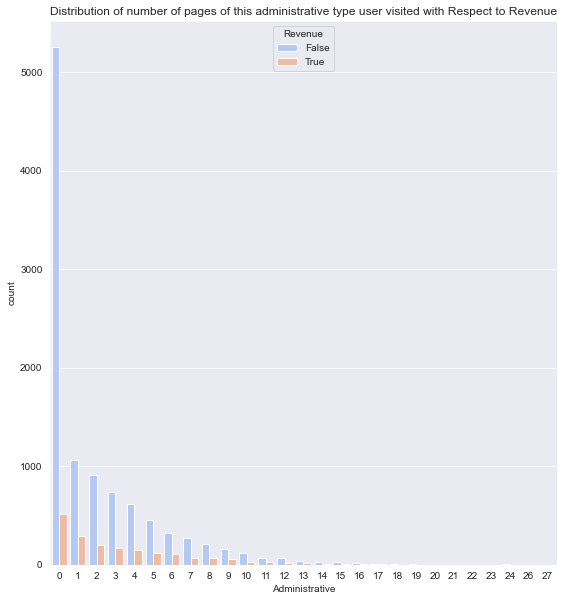

In [20]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,2)
plt.title('Distribution of number of pages of this administrative type user visited with Respect to Revenue')
sns.countplot(x= 'Administrative', hue = 'Revenue', data = data, palette='coolwarm')
plt.show()

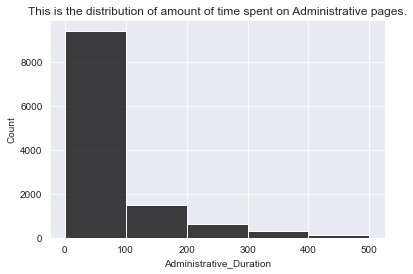

In [21]:
sns.histplot(data['Administrative_Duration'], bins = [0,100,200,300,400,500],color='Black')
plt.title('This is the distribution of amount of time spent on Administrative pages.')
plt.show()

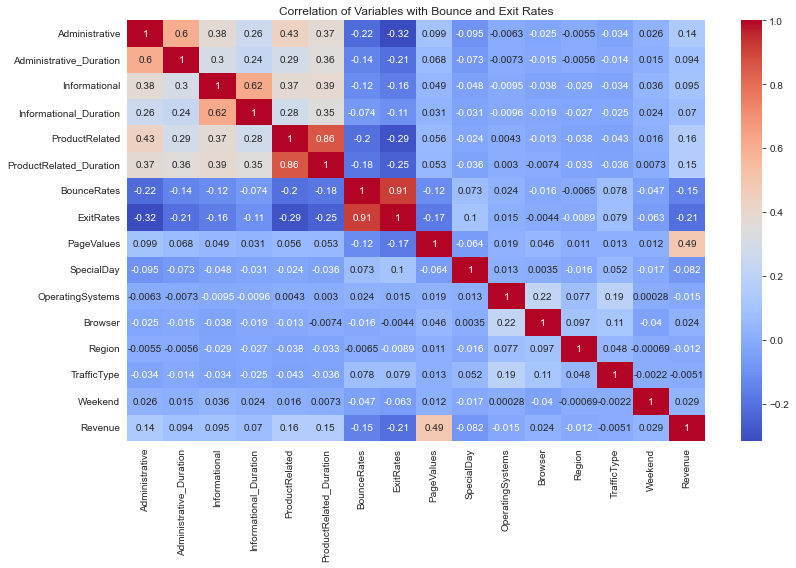

In [10]:
#2.Strategies to Reduce Bounce and Exit Rates:
correlation = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation of Variables with Bounce and Exit Rates")
plt.tight_layout()


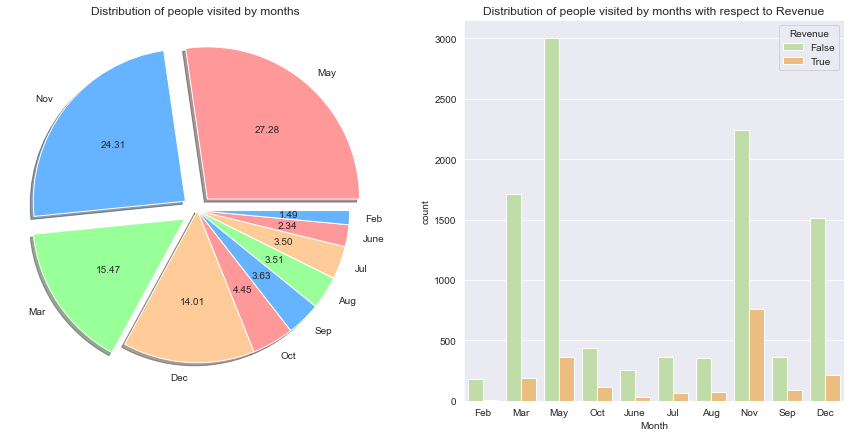

In [12]:
#3.Visitor behavior variation by month:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.title('Distribution of people visited by months ')
plt.pie(x = data['Month'].value_counts(),
       labels = ['May', 'Nov', 'Mar', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June', 'Feb'],
       autopct='%.2f',
       colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
       shadow = True,
       explode = (0.1,0.1,0.1,0,0,0,0,0,0,0))

plt.subplot(1,2,2)
plt.title('Distribution of people visited by months with respect to Revenue')
sns.countplot(x= 'Month', hue = 'Revenue', data = data, palette='Spectral_r')
plt.show()


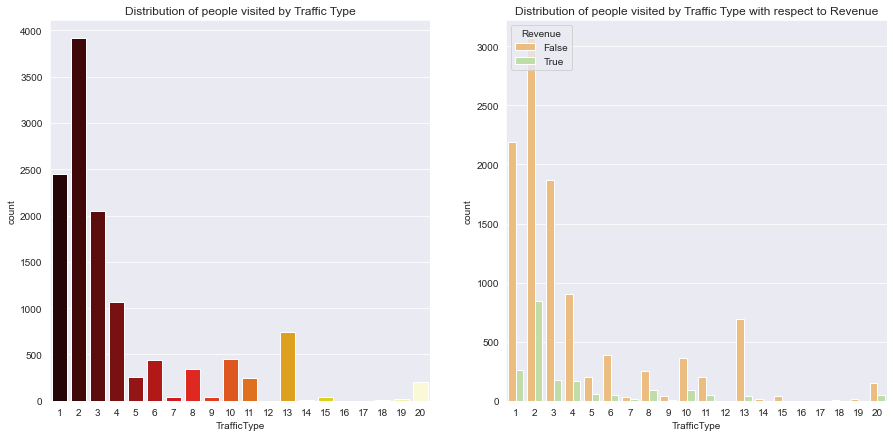

In [15]:
#4.Patterns in visitor distribution by traffic type:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.title('Distribution of people visited by Traffic Type')
sns.countplot(x = data['TrafficType'] , palette='hot')

plt.subplot(1,2,2)
plt.title('Distribution of people visited by Traffic Type with respect to Revenue')
sns.countplot(x= 'TrafficType', hue = 'Revenue', data = data, palette='Spectral')
plt.show()


In [26]:
data['Revenue'] = data['Revenue'].astype(int)
data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [27]:
data['Weekend'] = data['Weekend'].astype(int)
data['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [28]:
data = pd.get_dummies(data = data, columns=['Month', 'VisitorType'], drop_first=True)
data.shape

(12330, 27)

In [29]:
#5.Revenue Forecasting Model using Random Forest Classifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


x = data.drop(columns='Revenue')
y = data['Revenue']

# Performing Random Over Sampling
os = RandomOverSampler()
x_oversample, y_oversample = os.fit_resample(x, y)

# Splitting the oversampled data
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(x_oversample, y_oversample, test_size=0.3, random_state=42)

# Training Random Forest Classifier
rf_model_os = RandomForestClassifier(random_state=42)
rf_model_os.fit(X_train_os, y_train_os)
rf_accuracy_os = rf_model_os.score(X_test_os, y_test_os)

# Training SVM Classifier
svm_model_os = SVC(random_state=42)
svm_model_os.fit(X_train_os, y_train_os)
svm_accuracy_os = svm_model_os.score(X_test_os, y_test_os)

# Training KNN Classifier
knn_model_os = KNeighborsClassifier()
knn_model_os.fit(X_train_os, y_train_os)
knn_accuracy_os = knn_model_os.score(X_test_os, y_test_os)

print("Random Forest Accuracy:", rf_accuracy_os)
print("SVM Accuracy:", svm_accuracy_os)
print("KNN Accuracy:", knn_accuracy_os)



Random Forest Accuracy: 0.9584266069715383
SVM Accuracy: 0.7236968340262232
KNN Accuracy: 0.837863767188999
